In [1]:
import os

list_folders = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/dataset')))
print(list_folders)

['a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'đ', 'ĩ', 'ũ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ']


In [2]:
from PIL import Image
import numpy as np

X_train = []
y_train = []
index = 0
for i in list_folders:
    alphabet = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/data_train/' + i)))
    for j in alphabet:
        img = Image.open('E:/HandwrittenVietnameseRecognition/data_train/' + i + '/' + j).convert('L')
        X_train.append(np.array(img).ravel())
        y_train.append(index)
    index += 1

In [3]:
X_test = []
y_test = []
index = 0
for i in list_folders:
    alphabet = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/data_test/' + i)))
    for j in alphabet:
        img = Image.open('E:/HandwrittenVietnameseRecognition/data_test/' + i + '/' + j).convert('L')
        X_test.append(np.array(img).ravel())
        y_test.append(index)
    index += 1

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13422, 320)
(5807, 320)
(13422,)
(5807,)


In [6]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

kfold = KFold(n_splits=5, shuffle=True)
accuracy_list = []
fold_idx = 1
ap = [0.0001, 0.001, 0.01, 0.1, 1]
i = 0
for train_ids, val_ids in kfold.split(X_train, y_train):
    model = MultinomialNB(alpha = ap[i])
    model.fit(X_train[train_ids], y_train[train_ids])
    y_predict = model.predict(X_train[val_ids])
    scores = accuracy_score(y_predict, y_train[val_ids])

    print("Finished Fold", fold_idx, 'with alpha =', ap[i])
    accuracy_list.append(scores * 100)

    fold_idx = fold_idx + 1
    i += 1

Finished Fold 1 with alpha = 0.0001
Finished Fold 2 with alpha = 0.001
Finished Fold 3 with alpha = 0.01
Finished Fold 4 with alpha = 0.1
Finished Fold 5 with alpha = 1


In [11]:
for i in range(0, len(accuracy_list)):
  print('Alpha =', ap[i], '- Accuracy:', accuracy_list[i], '%')

print('* Accuracy avg:', np.mean(accuracy_list), '(+-', np.std(accuracy_list), ')')

Alpha = 0.0001 - Accuracy: 45.51210428305401 %
Alpha = 0.001 - Accuracy: 44.059590316573555 %
Alpha = 0.01 - Accuracy: 45.23099850968703 %
Alpha = 0.1 - Accuracy: 44.746646795827125 %
Alpha = 1 - Accuracy: 44.113263785394935 %
* Accuracy avg: 44.73252073810733 (+- 0.5818495791054016 )


In [12]:
model = MultinomialNB(alpha = 0.001)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [13]:
acc = accuracy_score(y_predict, y_test)
print(acc)

0.37850869640089546


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


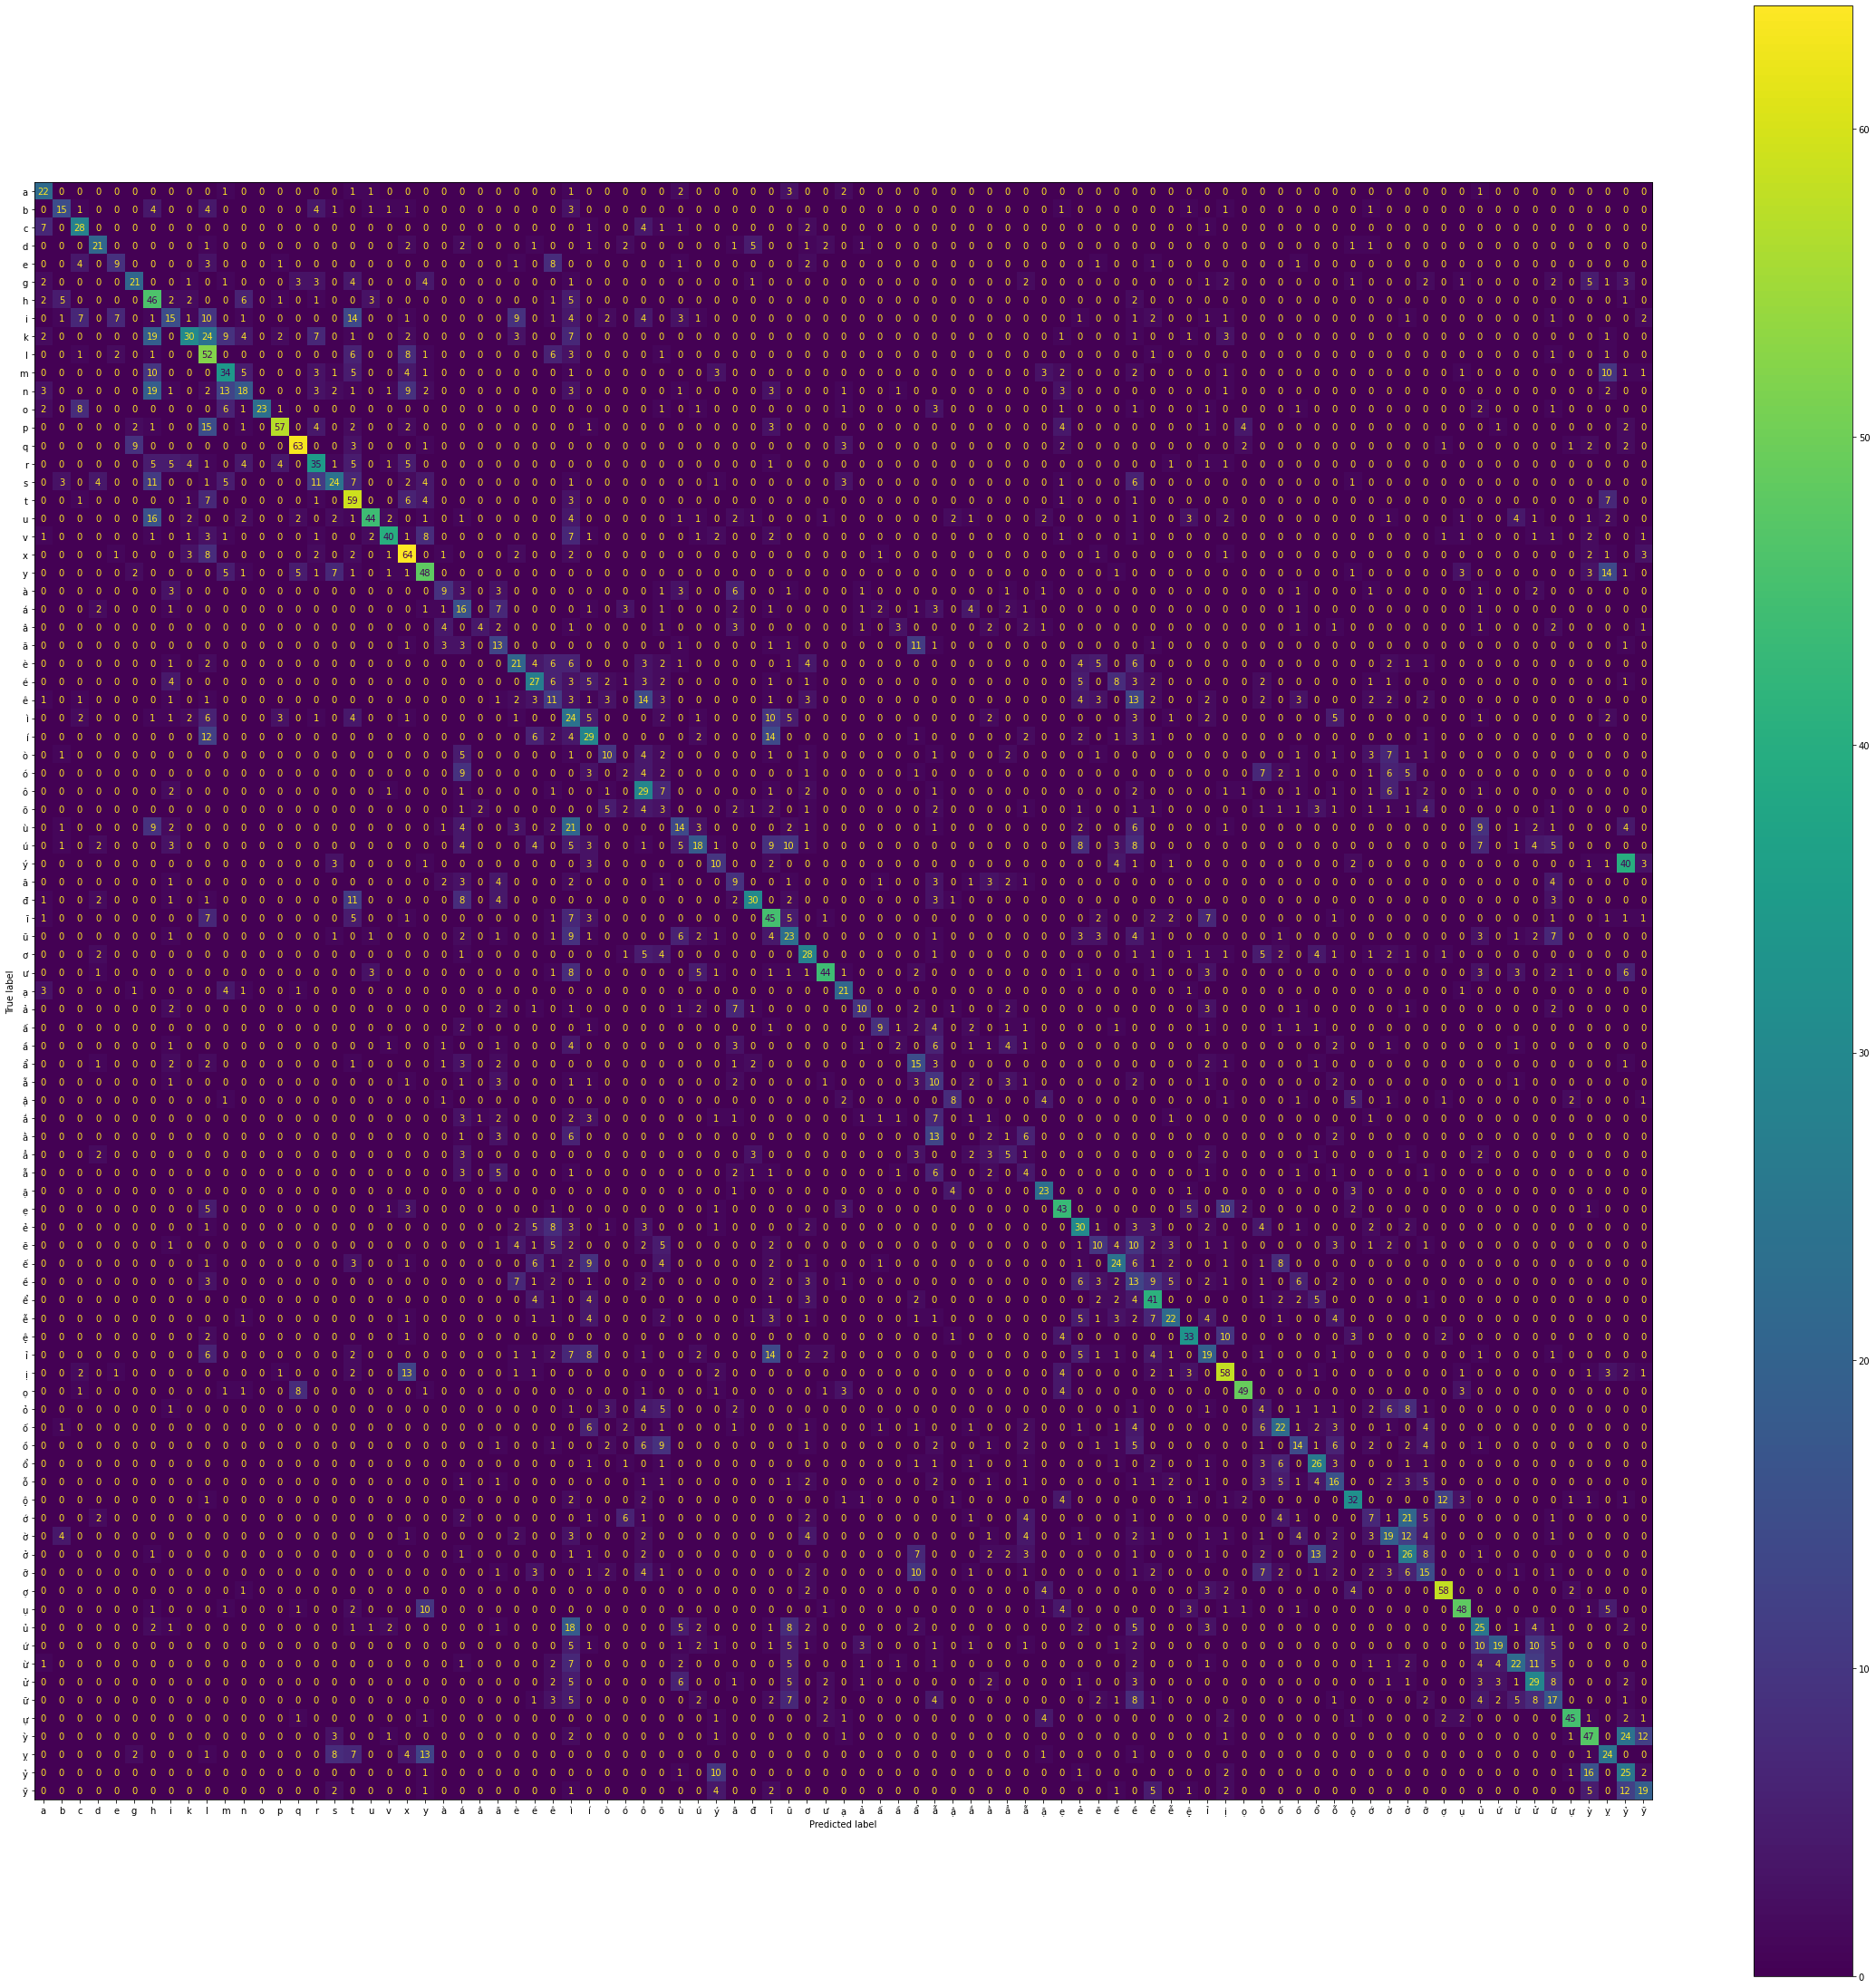

In [14]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 40, 40
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(model, X_test, y_test, display_labels=list_folders)
plt.show()